<a href="https://colab.research.google.com/github/mo-lanang/Data-Mining-Final-Project/blob/main/Final_Project_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


FINAL PROJECT OF DATA MINING

---



Currently, social media can be considered one of the most important parts of human life. As a means of disseminating information and communicating between individuals, there are many benefits that can be gained from social media. One of the uses of social media is as a source of data that can be processed and used as a consideration in decision-making in various fields with Social Media Analytics.

In this final project, the data used will be sourced from one social media platform, namely Twitter. The Twitter data used will covers topics related to the 2022 World Cup in Qatar. The tweets collected were only taken between December 20, 2022, and December 25, 2022. We want to analyze a sample of tweets from the Indonesian public after the 2022 World Cup in Qatar ended using several methods. It is hoped that the results of this analysis can provide useful insights/information for individuals, certain business actors, or other stakeholders related to the topic raised in this project.

Keywords:
1. Piala Dunia Qatar 2022
2. Scraping twitter
3. Cleaning data
4. EDA
5. Preprocessing data
6. Social Network Analysis
7. Centrality Analysis
8. Community Detection
9. Sentiment Analysis
10. K Nearest Neighbor
11. Decision Tree
12. Random Forest

First, import the library that will be used in the entire data processing process.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Run this code at the beginning to import all previously installed libraries.

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [ ]:
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import twint
import nest_asyncio
import urllib
import json
import networkx as nx
from spacy.lang.id import Indonesian
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from scipy.sparse import csr_matrix
nltk.download('punkt')
nltk.download('vader_lexicon')

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Scrape Data from Twitter

Next, data scraping will be carried out from Twitter social media related to the 2022 World Cup issue. Data scraping itself is an automated process of obtaining data from a website or platform using a program or code. Since the data to be obtained is approximately 11,000 tweet samples, a data limit of 11,000 will be applied.

In [ ]:
nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True

In [ ]:
### Scrape twitter data using "twint" library

config.Search = "piala dunia"
config.Limit = 11000
#config.Since = '2022-12-01'

twint.run.Search(config)
init_data = twint.storage.panda.Tweets_df
print(init_data.shape)

init_data.sample(6)

(11010, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
3026,1606653305392095232,1606653305392095232,1.671891e+12,2022-12-24 14:09:32,+0000,,Draw golin di menit akhir ibarat portugal jual...,in,[saemin],[],...,,,,,,[],,,,
3553,1606526207033757696,1606526207033757696,1.671861e+12,2022-12-24 05:44:30,+0000,,Pagi Sabtu hari ini saya telah meluangkan masa...,in,"[ry, demipayarumput]",[],...,,,,,,[],,,,
9823,1605248031699349504,1604977235475148800,1.671556e+12,2022-12-20 17:05:29,+0000,,@ChelseafanIndo Hanya ketika kegagalan Argenti...,in,[],[],...,,,,,,"[{'screen_name': 'ChelseafanIndo', 'name': '#P...",,,,
6672,1605805645311377409,1605805645311377409,1.671689e+12,2022-12-22 06:01:14,+0000,,"Susunan Pemain Terbaik Piala Dunia 2022, Ada H...",in,"[worldcup, harrymaguire, cristianoronaldo]",[],...,,,,,,[],,,,
6517,1605828501701300224,1605828501701300224,1.671694e+12,2022-12-22 07:32:04,+0000,,Prancis Pernah Ledek Messi di Piala Dunia 2018...,in,[],[],...,,,,,,[],,,,
10535,1605178274455310336,1605176348431249409,1.671539e+12,2022-12-20 12:28:18,+0000,,@idextratime Messi hanya tidur dengan piala du...,in,[],[],...,,,,,,"[{'screen_name': 'idextratime', 'name': 'Extra...",,,,


# Data Cleaning

After scraping the data, it is then cleaned so that it is ready for processing. The data cleaning process includes removing duplicate data and filtering the language used in tweets.

In [ ]:
### The overview of the scraped data

init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11010 entries, 0 to 11009
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11010 non-null  object 
 1   conversation_id  11010 non-null  object 
 2   created_at       11010 non-null  float64
 3   date             11010 non-null  object 
 4   timezone         11010 non-null  object 
 5   place            11010 non-null  object 
 6   tweet            11010 non-null  object 
 7   language         11010 non-null  object 
 8   hashtags         11010 non-null  object 
 9   cashtags         11010 non-null  object 
 10  user_id          11010 non-null  int64  
 11  user_id_str      11010 non-null  object 
 12  username         11010 non-null  object 
 13  name             11010 non-null  object 
 14  day              11010 non-null  int64  
 15  hour             11010 non-null  object 
 16  link             11010 non-null  object 
 17  urls        

In [ ]:
### Remove duplicated data in "username" and "tweet" columns

init_data.drop_duplicates(subset=['username', 'tweet'], inplace=True)

print('Jumlah baris dan kolom data sekarang: ', init_data.shape)

Jumlah baris dan kolom data sekarang:  (10440, 38)


In [ ]:
### Filter rows so that only the ones with Bahasa Indonesia will be retrieved

init_data = init_data.query('language == "in"')

print('Jumlah baris dan kolom data sekarang: ', init_data.shape)

Jumlah baris dan kolom data sekarang:  (10264, 38)


In [ ]:
### Import the data to .xlsx or .csv

init_data.to_excel('data tweet pildun 20-25 Desember 2022.xlsx', index=False)
init_data.to_csv('data tweet pildun 20-25 Desember 2022.csv', index=False)

# Import the Data Back to Google Colab and Further Cleaning

After the data cleaning process is complete and the data is saved in Excel or CSV format, the data is uploaded to GitHub and then re-imported using the relevant GitHub link.

In [ ]:
### Import the data back to Google Colab

df = pd.read_csv('https://raw.githubusercontent.com/mo-lanang/Sumber_Data_Final_Project_Data_Mining/main/data%20tweet%20pildun%2020-25%20Desember%202022.csv')
#df = pd.read_excel('isi dengan link dari sini, https://github.com/mo-lanang/Sumber_Data_Final_Project_Data_Mining')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10433 entries, 0 to 10432
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10433 non-null  object 
 1   conversation_id  10433 non-null  object 
 2   created_at       10433 non-null  object 
 3   date             10433 non-null  object 
 4   timezone         10433 non-null  int64  
 5   place            6 non-null      object 
 6   tweet            10433 non-null  object 
 7   language         10432 non-null  object 
 8   hashtags         10432 non-null  object 
 9   cashtags         10432 non-null  object 
 10  user_id          10432 non-null  object 
 11  user_id_str      10432 non-null  object 
 12  username         10432 non-null  object 
 13  name             10431 non-null  object 
 14  day              10431 non-null  float64
 15  hour             10432 non-null  object 
 16  link             10432 non-null  object 
 17  urls        

Next, the data cleaning process will be carried out again. This data cleaning process includes handling missing values and adjusting data types for variables found in the dataset.

In [ ]:
### Count the percentage of missing values in each column

percent_miss = round((df.isnull().sum() / len(df)) * 100, 2)

print(percent_miss.sort_values(ascending=False))

trans_dest         100.00
retweet_id         100.00
geo                100.00
source             100.00
user_rt            100.00
user_rt_id         100.00
retweet_date       100.00
translate          100.00
trans_src          100.00
near                99.99
place               99.94
quote_url           95.31
thumbnail           80.79
reply_to             0.02
search               0.02
nretweets            0.02
nreplies             0.02
nlikes               0.02
retweet              0.02
video                0.02
day                  0.02
name                 0.02
user_id              0.01
urls                 0.01
link                 0.01
hour                 0.01
username             0.01
user_id_str          0.01
photos               0.01
cashtags             0.01
hashtags             0.01
language             0.01
date                 0.00
created_at           0.00
conversation_id      0.00
timezone             0.00
tweet                0.00
id                   0.00
dtype: float

Columns/variables with more than 80% missing values do not contain much information that can be extracted. Therefore, they will be discarded.

In [ ]:
### Remove the columns with missing value percentage > 80%

miss_cols = percent_miss[percent_miss > 80].index

df.drop(columns=miss_cols, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10433 entries, 0 to 10432
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10433 non-null  object 
 1   conversation_id  10433 non-null  object 
 2   created_at       10433 non-null  object 
 3   date             10433 non-null  object 
 4   timezone         10433 non-null  int64  
 5   tweet            10433 non-null  object 
 6   language         10432 non-null  object 
 7   hashtags         10432 non-null  object 
 8   cashtags         10432 non-null  object 
 9   user_id          10432 non-null  object 
 10  user_id_str      10432 non-null  object 
 11  username         10432 non-null  object 
 12  name             10431 non-null  object 
 13  day              10431 non-null  float64
 14  hour             10432 non-null  object 
 15  link             10432 non-null  object 
 16  urls             10432 non-null  object 
 17  photos      

In [ ]:
### Remove rows with a minimum of one missing value in any column

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10430 entries, 0 to 10432
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10430 non-null  object 
 1   conversation_id  10430 non-null  object 
 2   created_at       10430 non-null  object 
 3   date             10430 non-null  object 
 4   timezone         10430 non-null  int64  
 5   tweet            10430 non-null  object 
 6   language         10430 non-null  object 
 7   hashtags         10430 non-null  object 
 8   cashtags         10430 non-null  object 
 9   user_id          10430 non-null  object 
 10  user_id_str      10430 non-null  object 
 11  username         10430 non-null  object 
 12  name             10430 non-null  object 
 13  day              10430 non-null  float64
 14  hour             10430 non-null  object 
 15  link             10430 non-null  object 
 16  urls             10430 non-null  object 
 17  photos      

In [ ]:
### Change the types of some columns

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['hour'] = df['hour'].astype('int64')

# Sentiment Analysis Preprocessing

Next, Sentiment Analysis will be performed. Before performing Sentiment Analysis, data preprocessing is carried out by cleaning up dirty tweet data. The data cleaning process includes removing symbols (but not underscores), removing links, removing mentions in a tweet, lemmatization or changing a word to its root form based on the context of the word, tokenization or breaking sentences into words, and replacing slang words with standard words.

In [ ]:
### Import Indonesian stop words list using the help from "Sastrawi" library

Sastrawi_StopWords_id = factory.get_stop_words()

print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

126


In [ ]:
### Import list of slang words from Github and add other slang words

slang = urllib.request.urlopen('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt')
slang = json.loads(slang.read())

len(slang)

1018

In [ ]:
### Create a function to clean dirty tweet data

def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip())) # Encode tweet data
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove symbols,  but not underscore
    docx = stemmer.stem(docx) # Lemmatize
    docx = TextBlob(docx).words # Tokenization

    for i, t in enumerate(docx): # Process slang words
      if t in slang.keys():
        docx[i] = slang[t]
    docx = ' '.join(docx)

    return docx

In [ ]:
### Apply the above function to the dirty tweet data

df['cleaned_tweet'] = df['tweet'].apply(cleanText)

In [ ]:
  ### Preview of cleaned tweet data

df[['tweet', 'cleaned_tweet']].sample(10)

,tweet,cleaned_tweet
901,Aksi koki selebritas Salt Bae yang memegang da...,aksi koki selebritas salt bae yang pegang dan ...
10347,FIFA siapkan Piala Dunia terakbar dengan 48 ne...,fifa siap piala dunia akbar dengan 48 negara s...
7064,@ChelseafanIndo Hanya ketika kegagalan Argenti...,chelseafanindo hanya ketika gagal argentina di...
4542,"Bocoran dari Legenda, Messi Bakal Tampil di Pi...",bocor dari legenda messi bakal tampil di piala...
10414,Emiliano Martinez mengungkap alasan terkait se...,emiliano martinez ungkap alas kait selebrasi u...
9358,@senogp @MoooiPustaka Leo Messi bisa angkat pi...,senogp moooipustaka leo messi bisa angkat pial...
1526,@AlionelMessi_ Renovasi anggaran besar tapi ha...,alionelmessi renovasi anggar besar tapi hasil ...
3581,"VITTORIO POZZO (Italia), adalah satu-satunya p...",vittorio pozzo italia adalah satu satu latih y...
7263,SISA-SISA SETERU FINAL PIALA DUNIA 2022 https...,sisa sisa seteru final piala dunia 2022
10390,Pertama kali ngikutin piala dunia yang bener-b...,pertama kali ngikutin piala dunia yang benar b...


In [ ]:
### Save the cleaned tweet data to .txt file

df[['cleaned_tweet']].to_csv("cleaned_tweet.txt", index=False, encoding='utf8', header=False)

# EDA

For the next stage, Exploratory Data Analysis (EDA) will be conducted to examine general information about the data used.

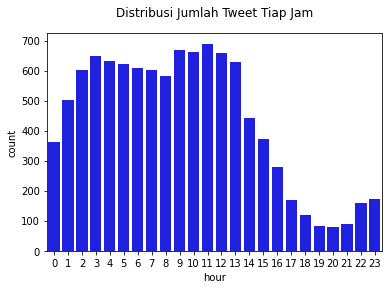

In [ ]:
### The number of tweets in each hour

df_hour = df['hour'].value_counts().sort_index()

ax = sns.barplot(x=df_hour.index, y=df_hour, color='blue')
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Hourly Tweets Frequency Distribution', y=1.05)

plt.show()

The plot above shows the number of tweets posted between December 20, 2022, and December 25, 2022, regarding the 2022 Qatar World Cup. From the plot above, it can be seen that the majority of users tweeted about the 2022 Qatar World Cup in the morning to afternoon, starting between 2:00 a.m. and 1:00 p.m. Then the number of tweets decreased dramatically in the afternoon to evening, starting between 2:00 p.m. and 12:00 a.m. This could be because the 2022 Qatar World Cup ended on December 18, 2022, with World Cup matches usually starting at 10:00 p.m. Since the World Cup was over, the number of users tweeting at that time decreased.

In [1]:
### Correlation Plot
cor = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square = True);

NameError: name 'df' is not defined

From the correlation heatmap graph above, it can be concluded that:

*   There is a strong positive linear correlation between the number of likes and the number of retweets, with $r=0.85$.
*   There is a strong positive linear correlation between the number of likes and the number of replies, with $r=0.83$.
*   There is a moderate positive linear correlation between the number of replies and the number of retweets, with $r=0.66$.

# Text Visualization

Text visualization of the cleaned tweet data will be performed using Voyant.

### WordClouds

![picture](https://drive.google.com/uc?export=view&id=1Qeg4N0gDT9BUujUg6NNHDc7WbKjiAnD7)

In the WordClouds above, it can be seen that the words “Piala” (Cup) and “Dunia” (World) are the most dominant words among the others, which means that “Piala” and “Dunia” are the words that appear most frequently in the topic we are discussing, namely the 2022 World Cup. In addition, the words “Argentina” and “Messi” also appear to have a larger text size than the others.

From the tweet data used, the word “Messi” tends to appear in tweets discussing the best players during the 2022 Qatar World Cup. Meanwhile, the word “Argentina” tends to appear in tweets discussing the final match because Argentina was one of the countries that made it to the final alongside France.

Argentina's success in winning the championship is also one of the reasons why the words “Argentina” and “Messi,” as the captain of the national team, are frequently mentioned in the data we used.

### Links

![picture](https://drive.google.com/uc?export=view&id=1SX1DlVBDrvaQy2KU3TvvB3iFPUooW139)

In the Links above, there are two colors in the graph visualization, namely blue and orange. The blue color indicates words that appear more frequently, while the orange color indicates supporting words. In the Links visualization results from the data we used, the words Cup, World, Qatar, 2022, and Win are blue. Meanwhile, the words Argentina, Messi, Champion, and Final are orange. The words Cup and World are also the two most dominant words in the Links above.

In addition, if one word is connected to another word by a line in the Links above, it indicates that the two words often appear in the same sentence. For example, in the image, the words “Cup” and “World” are connected by a line, indicating that these two words often appear in the same sentence. The words “Cup” and “World” also tend to be connected to all supporting words in the links above, which generally discuss the 2022 World Cup title, namely Argentina as the winning country, Messi as the captain of the Argentine national team, and the word “Champion” itself.

# Social Network Analysis

Social Network Analysis is a method for visualizing the activities and strength of connections between users on social networks, as well as a means of identifying interactions in knowledge sharing. Social network analysis can also map and measure relationships between people, groups, organizations, computers, or bodies of information/knowledge, as well as other processing within the network.

Social Network Analysis (SNA) can also be described as a science that studies human relationships with the help of graph theory. SNA studies the structure of relationships that connect individuals or other social units and the dependencies in behavior or attitudes related to the structure of social relationships.

These relationships are represented by nodes, or vertices, which symbolize actors or users, and ties, also known as edges, links, or connections, which symbolize the relationships between actors.

Pada bagian ini kami akan melakukan teknik *Social Network Analysis* (SNA) dengan menggunakan username twitter sebagai nodes atau vertices dan mention sebagai edges. Berikut adalah tahapan pengerjaan yang akan kami lakukan.

## Nodes and Edges Identification Using Python

In this section, we will create nodes (Twitter usernames) and edges (mentions) using Python.

In [ ]:
### Create a new dataframe that only consists of "username" & "tweet" columns

df_mention = df[['username', 'tweet']]
df_mention.rename({'username': 'user'}, axis=1, inplace=True)
df_mention.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,user,tweet
0,mulyadi_ipul,@CNNIndonesia Pekerjaan bodoh dan GK masuk aka...
1,AnakBai36994926,@amazoght @idextratime Bukan hanya dari piala ...
2,ArdanNews,"Jadwal Liga Spanyol usai Piala Dunia 2022, Mis..."
3,ArdanNews,Prediksi Skor Brentford vs Tottenham Hotspurs ...
4,bukanwarini,"Lawan @xel_ad, di piala dunia kalah sih kemari..."


In [ ]:
### Transform "user" & "tweet" data into list

user = df_mention['user'].to_list()
tweet = df_mention['tweet'].to_list()

In [ ]:
### Create an empty graph then add users who become the nodes/vertices

graf = nx.Graph()
graf.add_nodes_from(user)

print('# nodes = ', graf.number_of_nodes())
print('# edges = ', graf.number_of_edges())

Banyak nodes =  5454
Banyak edges =  0


In [ ]:
### Create a for loop to identify users whose being mentioned by another users

for u, t in zip(user, tweet):
    mentions =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentions:
        if "." not in mention: #skip email
            graf.add_edge(u, mention)

print('# vertex = ', graf.number_of_nodes())
print('# Edges = ', graf.number_of_edges())

Banyak vertex =  7177
Banyak Edges =  4584


In [ ]:
### Save the result in the form of a Gephi file

nx.write_gexf(graf, "pildun_20-25 Desember_2022.gexf")

The type of graph generated by Python using the NetworkX library is undirected, where the relationship or connection between one node and another is not one-way but two-way.

## Construct SNA Graph Using Gephi

In this section, we will create a graph using nodes in the form of Twitter usernames and edges in the form of mentions that were created in the previous section. Here are the steps to do so.

First, the “.gexf” file generated in the previous section will be imported into Gephi as follows.

![picture](https://drive.google.com/uc?export=view&id=11-0PKbZ7bbcl0R-1brFuLcWncMa63eup)

Then, in the “Statistics” section, run the “Modularity Report” to obtain the score and modularity results as follows.

![picture](https://drive.google.com/uc?export=view&id=1Nh6bJbNE9mfsm_pxEJENNTFm6QF0PnWI)

From the modularity report above, a modularity value of 0.877 was obtained. This value indicates that in the network that will be formed later, there is a strong tendency for each node to form a cluster or group.

Next, return to the “Statistics” section and run the “Network Diameter Report” to obtain several scores such as Betweenness Centrality and Closeness Centrality as follows.

![picture](https://drive.google.com/uc?export=view&id=1NSzaZqvz2HaCWiZ6rj5_6HcIZc7UtbHd)

Then, a layout will be selected to form the graph network. First, we apply a layout called Force Atlas 2 as follows.

![picture](https://drive.google.com/uc?export=view&id=1mYuK1ChC56cphVwUN-8cWJVcZKOPj-TT)

Next, we applied a layout called Yifan Hu Proportional as follows.

![picture](https://drive.google.com/uc?export=view&id=1rTzUPA3mfW1GCc1BXTUNqV8K4jzpnz_O)

Then, the colors of each node will be partitioned based on the modularity results as follows.

![picture](https://drive.google.com/uc?export=view&id=1_5iowFjBsX2jupN_AvM8qn9Imgt4TuDX)

Next, the size of each node will be partitioned based on its degree centrality as follows.

![picture](https://drive.google.com/uc?export=view&id=1yWWGFDEH7u2VZ4PXWUEWF0_zJIELaMyh)

Next, the size of the text for each node will be partitioned based on its degree centrality as follows.

![picture](https://drive.google.com/uc?export=view&id=1FlRgNuT6I4E-DMGm7lgQNsXUM22O16PD)

Then, the results of the graph network degree centrality that has been done in the steps above will be saved as a “.png” file.

Next, the size of each node and the text size of each node will be partitioned based on its eigenvector centrality as follows.

![picture](https://drive.google.com/uc?export=view&id=1yUw6udc-scxwD1Lwm-4xbJCvli_lsu4W)

![picture](https://drive.google.com/uc?export=view&id=1-_kLRF3Hy6WXDMnNAuKqHoTDbdQsS1Gy)

Then, the results of the graph network eigenvector centrality that has been performed in the steps above will be saved as a “.png” file.

> Here is the result of the network graph using **degree centrality**.



![picture](https://drive.google.com/uc?export=view&id=1j88_hQg0PgPDSqAOwV3vU9vxFT3S415e)

> Here is the result of the network graph using **eigenvector centrality**.



![picture](https://drive.google.com/uc?export=view&id=1OpO-GlNCZzn9gtOs86gJUR6vQUmZlm_w)

## Insight from Both Graphs

### Based on *Centrality Analysis*

The Centrality Analysis we used in our network graph is degree centrality and eigenvector centrality. Degree centrality is centrality that shows the number of direct connections or interactions that a node or vertex has. The higher the centrality value, the more direct connections or interactions a node or vertex has with other nodes, so the number of nodes that can be reached directly will be greater. This centrality value can be used to determine which nodes have the greatest influence in a network. Meanwhile, eigenvector centrality is a measure that shows how many direct connections or interactions a node has with other nodes that also have high connectivity. This centrality value can be used to determine which nodes have the most connections with other nodes that are also well-connected.

Based on the degree centrality network graph above, it can be seen that the user “idextratime” has a very high degree centrality value in the network, followed by the user “SiaranBolaLive”. There are indications that the user “idextratime” has a high frequency of directly mentioning other users, or it could be that there are many users who directly mention “idextratime” in their tweets. This may also indicate that the user “idextratime” is the most influential user on the topic of the 2022 World Cup in Qatar between December 20, 2022, and December 25, 2022, on Twitter based on mentions.

Furthermore, based on the eigenvector centrality network graph above, it can be seen again that the user “idextratime” has a very high eigenvector centrality value. This may indicate that the user “idextratime” often mentions other users who also frequently mention other users in topics related to the 2022 World Cup in Qatar between December 20, 2022 and December 25, 2022 on Twitter.

Based on the above explanations, here are some insights/information that we can provide:

1. Since the user “idextratime” has a high degree centrality and eigenvector centrality value, which indicates that this user often mentions other users or is mentioned, it is possible that the user “idextratime” has a high ability to influence other users to interact with them. This could be due to the ability of the user “idextratime” to create various types of tweets that are interesting and easily accepted by other users regarding the 2022 World Cup in Qatar.
2. The above ability can be utilized by the user “idextratime” himself, for example, to sell various types of merchandise related to the 2022 Qatar World Cup, such as soccer jerseys, soccer shoes, and others. The user “idextratime” can also utilize this ability to offer advertising services on their Twitter account page, which is still closely related to the topic of the 2022 Qatar World Cup. Other users can also collaborate with the user “idextratime” to, for example, market their products/businesses.

### Based on *Community Detection*

*Community Detection* is a technique that can be used to find a community in a network by performing separation. In the network graph above, both the graph for degree centrality and eigenvector centrality show that there are seven main clusters/communities. The seven clusters/communities are clusters/communities in pink, light green, black, orange, red, light blue, and dark green. Then, to see what tweet topics represent each community, we will look at the tweets or mentions of users who have the highest degree centrality in each community. The following are the users with the highest degree centrality for each community:

1. Pink community: “idextratime”
2. Light green community: “SiaranBolaLive”
3. Black community: “FaktaSepakbola”
4. Orange community: “GOAL”
5. Red community: “PSSI”
6. Light blue community: “registaco”
7. Dark green community: “indosat”

Below are some tweets from the users mentioned above.

In [ ]:
### Pink community

display(df[df['username'].str.contains('idextratime')].loc[:, ['tweet']])

,tweet
1473,Weekend ini tanpa Piala Dunia dan 5 liga top E...
1777,Sebuah petisi online yang ditujukan kepada FIF...
1867,RESMI : Goal sepeda Richarlison ke gawang Serb...
1869,RESMI : Andre Onana (26) mengumumkan pensiun d...
3401,"Ahmed Al Barwani, (mantan anggota dewan penase..."
3828,🚨 BREAKING: Cristiano Ronaldo telah mencapai k...
4380,"Hanya Pele, Lionel Messi, dan Ronaldo Nazario ..."
5076,"Daily reminder, Lionel Messi adalah juara Pia..."
5124,Kangen Piala Dunia
5208,🚨 BREAKING: Di antara banyak klub yang bermina...


In [ ]:
### Light green community

display(df[df['username'].str.contains('SiaranBolaLive')].loc[:, ['tweet']])

,tweet
186,#FIFAWorldCupQatar2022 👍✊ Thanks Qatar 🇶🇦 PIAL...
1153,"Pep Guardiola:""Kalvin Phillips overweight sete..."
2930,FIFA sedang melakukan investigasi lantaran Sal...


In [ ]:
### Black community

display(df[df['username'].str.contains('FaktaSepakbola')].loc[:, ['tweet']])

,tweet
98,Beberapa Rekor di #FIFAWorldCup yang berhasil ...
1895,"Gol akrobatik Richarlison ke gawang Serbia, be..."
3405,"Kondisi di Qatar kembali normal, sudah tidak s..."
5582,Starting XI laga persahabatan PSG vs Quevilly-...
5598,Baru beberapa hari saja setelah Kylian Mbappe ...
6071,Parade Juara Piala Dunia 2022 Timnas Argentina...
6656,Emiliano Martinez terlihat memegang sebuah bon...
6879,Sambutan Masyarakat untuk Timnas Maroko hari i...
7190,"Panas terik saat parade trofi Piala Dunia, bia..."
8043,Malam pertama Lionel Messi dengan trofi Piala ...


In [ ]:
### Orange community

display(df[df['username'].str.contains('GOAL')].loc[:, ['tweet']])

,tweet
26,Drama Baru Karim Benzema: Unfollow mayoritas ...
287,"🗣️ ""Terima kasih telah memberikan saya Piala D..."
464,Tak terasa sudah tujuh hari berlalu sejak kita...
568,"💬 ""Kami melawan tim terbaik di dunia, saya bis..."
700,Seorang fans Argentina meluncurkan petisi onli...
...,...
8625,Penampilan Emiliano Martinez selama Piala Duni...
8693,Lionel Messi pamer keberhasilan dirinya dengan...
9056,Performa Cristiano Ronaldo di Piala Dunia 2022...
9198,✅ Sportivitas tanpa batas ✅ Fans &amp; pemain ...


In [ ]:
### Red community

display(df[df['tweet'].str.contains('@PSSI')].loc[:, ['tweet']])

,tweet
367,@detiksport @AremafcOfficial @PSSI @premierlea...
961,@akbarfaizal68 @PSSI Indonesia nggak bisa lolo...
984,#GelanggangTanya Jaman ketum Edy Rahmayadi &am...
1188,@PSSI Semakin Optimis Kita bisa masuk piala du...
1493,"@PSSI Efek piala dunia masih terasa, maka nya ..."
1619,"@GIBOLofficial Mungkin ketika hujan lebat,sist..."
1621,@akbarfaizal68 @PSSI Timnas itu q yakin bisa m...
1622,@MuchammadArifS2 @ahmadarief5150 @Persija_Jkt ...
1663,@BroadcastBola @PSSI @Liga1Match @KEMENPORA_RI...
1715,@PSSI Salam hormat terhadap Timnas Garuda dan ...


In [ ]:
### Light blue community

display(df[df['username'].str.contains('registaco')].loc[:, ['tweet']])

,tweet
748,Tato baru Di Maria adalah trofi Piala Dunia 🥶 ...
3206,"Gak sabar Piala Dunia 2026, deh. Liat Mbappe..."
7332,Apa mimpinya Messi bersama dengan trofi Piala ...


In [ ]:
### Dark green community

display(df[df['tweet'].str.contains('@indosat')].loc[:, ['tweet']])

,tweet
5143,Dan Final ini mempertemukan dua bintang terbai...
6241,@idextratime ✅Pencetak gol Prancis pd final Pi...
6249,✅Pencetak gol Prancis pd final Piala Dunia 199...
7150,Pencetak gol Prancis pada final Piala Dunia 19...
7307,Pencetak gol Prancis di final Piala Dunia 1998...
7407,Pencetak Gol Prancis Di Final Piala Dunia 1998...
7434,pencetak gol prancis di final piala dunia 1998...
7450,Pencetak gol Prancis di final Piala Dunia 1998...
7497,Pencetak gol Prancis pada final Piala Dunia 19...
7576,@idextratime Pencetak gol di Piala Dunia tahun...


From the results of the codes above, here are some insights/information that can be gleaned from each community:

1. The pink community contains tweets on topics such as player transfer news, events following the 2022 Qatar World Cup, and humorous tweets about soccer from the user “idextratime.”
2. The light green community contains tweets on topics related to several events after the 2022 Qatar World Cup ended.
3. The black community contains tweets on topics related to several player achievements after the World Cup ended and Argentina's victory at the 2022 Qatar World Cup.
4. The orange community contains tweets with topics that discuss the 2022 Qatar World Cup news in a more comprehensive and varied manner.
5. The red community contains tweets on topics related to Indonesian Twitter users' opinions about PSSI.
6. The light blue community contains tweets on topics related to opinions about Mbappe and Messi.
7. The dark green community contains tweets on topics related to a prize quiz held by Indosat and the user “idextratime”.

# Sentiment Analysis

Sentiment analysis is a field of natural language processing (NLP) that builds systems to recognize and extract opinions in text form. Text-based information is currently widely available on the internet in the form of forums, blogs, social media, and review sites. With the help of sentiment analysis, previously unstructured information can be converted into more structured data. We used sentiment analysis with the main objective of determining the distribution of Indonesian Twitter users' sentiments towards the 2022 Qatar World Cup between December 20, 2022, and December 25, 2022.

The sentiment analysis techniques we used are as follows:

1. Using the textblob library and manual processes to generate sentiments.
2. Using supervised methods for sentiment analysis.

Here are the steps involved.

## Using textblob Library and Manual Processes to Generate Sentiments

In this section, the textblob library will be used to generate sentiment from each tweet that has been cleaned and preprocessed in the previous section. However, there will be some tweets that will be manually assign because they cannot be processed by the textblob library. Here are the steps to do this.

In [ ]:
### Create a function to identify the polarity score

def Score_Pol_Sub(text):
  blob = TextBlob(text)
  analysis = blob.translate(from_lang='id', to='en')
  return analysis.sentiment

In [ ]:
### Create several initial dataframes for sentiment analysis

df_sentimen1 = df[['cleaned_tweet']].iloc[:500, [0]]
df_sentimen2 = df[['cleaned_tweet']].iloc[500:1000, [0]]
df_sentimen3 = df[['cleaned_tweet']].iloc[1000:1500, [0]]
df_sentimen4 = df[['cleaned_tweet']].iloc[1500:2000, [0]]
df_sentimen5 = df[['cleaned_tweet']].iloc[2000:2500, [0]]
df_sentimen6 = df[['cleaned_tweet']].iloc[2500:3000, [0]]
df_sentimen7 = df[['cleaned_tweet']].iloc[3000:3510, [0]]
df_sentimen8 = df[['cleaned_tweet']].iloc[3510:3515, [0]]   # this is the dataframe that would be manually assign using Excel
df_sentimen9 = df[['cleaned_tweet']].iloc[3515:4500, [0]]
df_sentimen10 = df[['cleaned_tweet']].iloc[4500:5000, [0]]
df_sentimen11 = df[['cleaned_tweet']].iloc[5000:5500, [0]]
df_sentimen12 = df[['cleaned_tweet']].iloc[5500:6000, [0]]
df_sentimen13 = df[['cleaned_tweet']].iloc[6000:6500, [0]]
df_sentimen14 = df[['cleaned_tweet']].iloc[6500:7000, [0]]
df_sentimen15 = df[['cleaned_tweet']].iloc[7000:7500, [0]]
df_sentimen16 = df[['cleaned_tweet']].iloc[7500:8000, [0]]
df_sentimen17 = df[['cleaned_tweet']].iloc[8000:8500, [0]]
df_sentimen18 = df[['cleaned_tweet']].iloc[8500:9000, [0]]
df_sentimen19 = df[['cleaned_tweet']].iloc[9000:9500, [0]]
df_sentimen20 = df[['cleaned_tweet']].iloc[9500:10000, [0]]
df_sentimen21 = df[['cleaned_tweet']].iloc[10000:, [0]]

**NOTES:**

In the process of generating sentiment using “textblob”, obstacles may arise, but these obstacles are not guaranteed to occur. An example of an obstacle is that “textblob” will still be able to process sentiment for tweet data from the first line to the 3000th line. However, starting from line 3001, “textblob” will no longer be able to process sentiment due to a limit. If this issue occurs, we will first import and save the sentiment data from the first 3000 lines into an Excel file. Then, we will restart the runtime on Google Colab and continue the sentiment analysis process using “textblob” from line 3001 onwards. Next, we will import and save the sentiment data results starting from row 3001 into an Excel file, which we will then combine with the previous rows in the Excel file.

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen1['polarity'] = df_sentimen1['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen2['polarity'] = df_sentimen2['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen3['polarity'] = df_sentimen3['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen4['polarity'] = df_sentimen4['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen5['polarity'] = df_sentimen5['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen6['polarity'] = df_sentimen6['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen7['polarity'] = df_sentimen7['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen9['polarity'] = df_sentimen9['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen10['polarity'] = df_sentimen10['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen11['polarity'] = df_sentimen11['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen12['polarity'] = df_sentimen12['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen13['polarity'] = df_sentimen13['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen14['polarity'] = df_sentimen14['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen15['polarity'] = df_sentimen15['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen16['polarity'] = df_sentimen16['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen17['polarity'] = df_sentimen17['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen18['polarity'] = df_sentimen18['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen19['polarity'] = df_sentimen19['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen20['polarity'] = df_sentimen20['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Calculating the polarity score for each tweet

df_sentimen21['polarity'] = df_sentimen21['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Combine all sentiments into one dataframe

df_sentimen_all = pd.concat([df_sentimen1, df_sentimen2, df_sentimen3, df_sentimen4, df_sentimen5,
                             df_sentimen6, df_sentimen7, df_sentimen8, df_sentimen9, df_sentimen10,
                             df_sentimen11, df_sentimen12, df_sentimen13, df_sentimen14, df_sentimen15,
                             df_sentimen16, df_sentimen17, df_sentimen18, df_sentimen19, df_sentimen20,
                             df_sentimen21])

In [ ]:
### Export into an Excel

df_sentimen_all.to_excel('pildun-sentimen-results.xlsx')

After the above processes are complete, using Excel, each tweet will be categorize into three categories. The first category is positive sentiment (1), which will be given to tweets with a polarity value > 0. The second category is neutral sentiment (0), which will be given to tweets with a polarity value = 0. The third category is negative sentiment (-1), which will be assigned to tweets with a polarity value < 0. We will then save the results as a “.csv” file and upload it to GitHub so that it can be imported back into Google Colab later.

## Import the Sentiment Analysis Data Back to Google Colab

In [ ]:
df_sa = pd.read_csv('https://raw.githubusercontent.com/mo-lanang/Sumber_Data_Final_Project_Data_Mining/main/pildun-sentimen-results.csv')

print(df_sa.info())
print('\n')
display(df_sa.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cleaned_tweet  10430 non-null  object 
 1   polarity       10430 non-null  float64
 2   sentimen       10430 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 244.6+ KB
None




,cleaned_tweet,polarity,sentimen
0,cnnindonesia kerja bodoh dan gk masuk akal ema...,-0.493750,-1
1,amazoght idextratime bukan hanya dari piala du...,-0.016667,-1
2,jadwal liga spanyol usai piala dunia 2022 misi...,0.333333,1
3,prediksi skor brentford vs tottenham hotspurs ...,0.325000,1
4,lawan xel ada di piala dunia kalah sih kemarin...,0.000000,0


## Insight from Sentiment Analysis Data

This section will explore several insights/information that can be gleaned from the tweet data for which sentiment analysis results have been obtained.

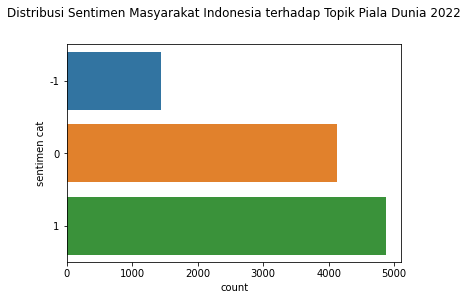

In [ ]:
### The Indonesian tweet sentiment distribution toward 2022 World Cup in Qatar

fig, ax = plt.subplots()

ax = sns.countplot(y=df_sa['sentimen'])
ax.set_ylabel('sentimen cat')
ax.set_title('The Indonesian Sentiment Distribution toward 2022 World Cup', y=1.1)

plt.show()

In [ ]:
display(df_sa['sentimen'].value_counts(sort=True).to_frame().rename(columns={'sentimen': '#'}))

,jumlah
1,4867
0,4124
-1,1439


From the two results above, it can be seen that positive sentiment (1) is the highest with 4,867 tweets. This is followed by neutral sentiment (0) with 4,124 tweets and negative sentiment (-1) with 1,439 tweets. This may indicate that after the 2022 World Cup in Qatar ended, the majority of Indonesian Twitter users still showed enthusiasm and positive responses to the 2022 World Cup in Qatar. This could be utilized by individuals or businesses, for example, by selling merchandise or items related to the 2022 World Cup in Qatar through Twitter.

### Wordclouds

#### Wordclouds for Positive Sentiment

In [ ]:
### Filter tweet data with positive sentiment

word_pos = df_sa.query('sentimen == 1').iloc[:, [0]]

word_pos.to_csv("positive_wordclouds.txt", index=False, encoding='utf8', header=False)

![picture](https://drive.google.com/uc?export=view&id=1s4JmX8GQhj1Pv3zatEhU0G94ZVeFh9Z4)

#### Wordclouds for Neutral Sentiment

In [ ]:
### Filter tweet data with neutral sentiment

word_neu = df_sa.query('sentimen == 0').iloc[:, [0]]

word_neu.to_csv("neutral_wordclouds.txt", index=False, encoding='utf8', header=False)

![picture](https://drive.google.com/uc?export=view&id=16wuC-VTDsBT5Z1jNrmxbsrARbBxjm56z)

#### Wordclouds for Negative Sentiment

In [ ]:
### Filter tweet data with negative sentiment

word_neg = df_sa.query('sentimen == -1').iloc[:, [0]]

word_neg.to_csv("negative_wordclouds.txt", index=False, encoding='utf8', header=False)

![picture](https://drive.google.com/uc?export=view&id=1FgRyqFx-nmP8W52UuoHos_bhGv-gScbP)

Based on the WordClouds of the three sentiments above, it can be seen that each sentiment tends to discuss the same topic, namely Argentina's success in winning the 2022 World Cup title, with Messi, as captain of the Argentine team, also becoming one of the most frequently discussed topics on Twitter.

## Supervised Machine Learning Method for Sentiment Analysis

The supervised learning method is used to find a model that is not only the best (has high accuracy) but also the most suitable model to use in predicting the sentiment of the Indonesian people towards the topic of the 2022 World Cup in Qatar. This model is expected to help certain types of businesses determine Indonesian public sentiment towards the topic of the 2022 World Cup in Qatar, provided that the data used has similar characteristics and demographics. We will compare several supervised learning methods and then determine the best model.

Here are the steps involved.

### Addressing Imbalance Data using Oversampling Technique

From the sentiment analysis conducted in the previous section, it can be seen that the variables to be used as labels (i.e., sentiment variables) have uneven numbers for each sentiment category. Positive sentiment (1) has a count of 4867, neutral sentiment (0) has a count of 4124, while negative sentiment (-1) has a count of 1439. Negative sentiment has a much smaller number compared to the other two sentiment categories. This can cause an issue where the machine learning model that will be created later has a better ability to predict positive and neutral classes, but the opposite for negative classes. Because of this, over sampling will be performed using the RandomOverSampling() function from the “imblearn” library as follows.

In [ ]:
ros = imblearn.over_sampling.RandomOverSampler(random_state=123)

X_ros, y_ros = ros.fit_resample(df_sa[['cleaned_tweet']], df_sa[['sentimen']])

print('There are', X_ros.shape[0] - df_sa[['cleaned_tweet']].shape[0], 'new data being added as a result of oversampling')

Terdapat 4171 data baru yang ditambahkan dari hasil over sampling


### Train & Test Split

The data is going to be split into training and test sets with a ratio of 80% for the training data and 20% for the test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros,
                                                    test_size=0.2, random_state=123)

X_train = X_train['cleaned_tweet']
y_train = y_train['sentimen']
X_test = X_test['cleaned_tweet']
y_test = y_test['sentimen']

print('Bentuk data train X: ', X_train.shape)
print('Bentuk data train y: ', y_train.shape)
print('Bentuk data test X: ', X_test.shape)
print('Bentuk data test y: ', y_test.shape)

Bentuk data train X:  (11680,)
Bentuk data train y:  (11680,)
Bentuk data test X:  (2921,)
Bentuk data test y:  (2921,)


### K-Nearest Neighbors Algorithm

#### Preprocess Text Data using VSM TF-IDF Vectorizer Technique & Determine the Optimal Hyperparameters


TF-IDF (Term Frequency - Inverse Document Frequency) is an algorithmic method used to calculate the weight of each commonly used word. This method calculates the Term Frequency (TF) and Inverse Document Frequency (IDF) values for each token (word) in each document in the corpus. Simply put, the TF-IDF method is used to determine how often a word appears in a document.

To determine the optimal hyperparameters, HalvingGridSearchCV from the scikitlearn library will be used.

In [ ]:
CV = 5
metric = 'accuracy'
params_knn = {}
params_knn['tfidfvectorizer__min_df'] = [5, 10, 15]
params_knn['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
params_knn['tfidfvectorizer__smooth_idf'] = [True]
params_knn['tfidfvectorizer__sublinear_tf'] = [True]
params_knn['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
params_knn['kneighborsclassifier__n_neighbors'] = [3, 5, 10]
params_knn['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe_knn = make_pipeline(TfidfVectorizer(), KNeighborsClassifier())
HgridCV_knn = HalvingGridSearchCV(pipe_knn, params_knn, cv=CV, scoring=metric,
                              verbose=1, return_train_score=True, random_state=123)
HgridCV_knn.fit(X_train, y_train)

print('\n')
print('Best score: ', HgridCV_knn.best_score_)
print('Best params: ', HgridCV_knn.best_params_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 144
max_resources_: 11680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 144
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 432
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 1296
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 3888
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 11664
Fitting 5 folds for each of 2 candidates, totalling 10 fits


Best score:  0.684648370497427
Best params:  {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance', 'tfidfvectorizer__max_df': 0.95, 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__smooth_idf': True, 'tfi

After finding the best hyperparameters for the TF-IDF vectorizer and KNN algorithm, text data preprocessing and KNN model training will be carried out using the best parameters found above as follows.

In [ ]:
### Preprocess text data using the optimal hyperparemeters founded

vsm_knn = TfidfVectorizer(max_df = 0.95, min_df = 5, ngram_range= (1, 1), smooth_idf=True, sublinear_tf=True)

X_train_knn = vsm_knn.fit_transform(X_train)
X_test_knn = vsm_knn.transform(X_test)

print(X_train_knn.shape, X_test_knn.shape)

(11680, 3764) (2921, 3764)


In [ ]:
### Train the model

knn_final = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_final.fit(X_train_knn, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

#### Model Evaluation

First, an assessment of the model's generalization performance will be conducted to check whether the existing model is overfitted or underfitted. A comparison will be made between the average train score and the test score. If the train score is high but the test score is low, there is an indication that the model is overfitted. If the train score is low and the test score is low, there is an indication that the model is underfitted.

In [ ]:
gen_perf_knn = pd.DataFrame(HgridCV_knn.cv_results_)
gen_perf_knn.query('rank_test_score == 1').loc[:, ['mean_train_score', 'mean_test_score']].drop_duplicates()

,mean_train_score,mean_test_score
240,0.999593,0.684648


From the results above, it can be seen that based on the results of five cross-validations, the average test score has decreased significantly when compared to the average train score. The decrease is around 30%. This may indicate that the model that has been created could be overfitted.

The model will then be evaluated by displaying several evaluation metrics as follows.

In [ ]:
### Predict using the previously created model

knn_pred = knn_final.predict(X_test_knn)

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           0       0.54      0.98      0.70       991
           1       0.96      0.17      0.29       954

    accuracy                           0.71      2921
   macro avg       0.83      0.70      0.65      2921
weighted avg       0.82      0.71      0.65      2921



### Decision Tree Algorithm

#### Preprocess Text Data using VSM TF-IDF Vectorizer Technique & Determine the Optimal Hyperparameters


TF-IDF (Term Frequency - Inverse Document Frequency) is an algorithmic method used to calculate the weight of each commonly used word. This method calculates the Term Frequency (TF) and Inverse Document Frequency (IDF) values for each token (word) in each document in the corpus. Simply put, the TF-IDF method is used to determine how often a word appears in a document.

To determine the optimal hyperparameters, HalvingGridSearchCV from the scikitlearn library will be used.

In [ ]:
CV = 5
metric = 'accuracy'
params_dt = {}
params_dt['tfidfvectorizer__min_df'] = [5, 10, 30]
params_dt['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
params_dt['tfidfvectorizer__smooth_idf'] = [True]
params_dt['tfidfvectorizer__sublinear_tf'] = [True]
params_dt['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
params_dt['decisiontreeclassifier__criterion'] = ['gini', 'entropy']
params_dt['decisiontreeclassifier__max_depth'] = [3, 5, 10]
params_dt['decisiontreeclassifier__min_samples_split'] = [5, 8, 12]
params_dt['decisiontreeclassifier__min_samples_leaf'] = [3, 7, 15]

pipe_dt = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
HGridCV_dt = HalvingGridSearchCV(pipe_dt, params_dt, cv=CV, scoring=metric,
                                  verbose=1, random_state=123, return_train_score=True)
HGridCV_dt.fit(X_train, y_train)
print(HGridCV_dt.best_score_)
print(HGridCV_dt.best_params_)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 30
max_resources_: 11680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1458
n_resources: 30
Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-pa

----------
iter: 1
n_candidates: 486
n_resources: 90
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-pa

----------
iter: 2
n_candidates: 162
n_resources: 270
Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.53333333 0.56666667 0.46666667 ... 0.35555556 0.35185185 0.34814815]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.60833333 0.63333333 0.64166667 ... 0.55277778 0.61666667 0.51111111]
  warnings.warn(


----------
iter: 3
n_candidates: 54
n_resources: 810
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.53333333 0.56666667 0.46666667 ... 0.40864198 0.40617284 0.40617284]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.60833333 0.63333333 0.64166667 ... 0.47808642 0.47253086 0.47253086]
  warnings.warn(


----------
iter: 4
n_candidates: 18
n_resources: 2430
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.53333333 0.56666667 0.46666667 ... 0.50740741 0.50740741 0.50740741]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.60833333 0.63333333 0.64166667 ... 0.54002058 0.54002058 0.54002058]
  warnings.warn(


----------
iter: 5
n_candidates: 6
n_resources: 7290
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.53333333 0.56666667 0.46666667 ... 0.50644719 0.50644719 0.50644719]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.60833333 0.63333333 0.64166667 ... 0.53004115 0.53004115 0.53004115]
  warnings.warn(


0.5065843621399176
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 7, 'decisiontreeclassifier__min_samples_split': 12, 'tfidfvectorizer__max_df': 0.95, 'tfidfvectorizer__min_df': 30, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__sublinear_tf': True}


After finding the best hyperparameters for the TF-IDF vectorizer and decision tree algorithm, text data preprocessing and decision tree model training will be carried out using the best parameters found above as follows.

In [ ]:
### Preprocess text data using the optimal hyperparemeters founded

vsm_dt = TfidfVectorizer(max_df = 0.95, min_df = 30, ngram_range= (1, 2), smooth_idf=True, sublinear_tf=True)

X_train_dt = vsm_dt.fit_transform(X_train)
X_test_dt = vsm_dt.transform(X_test)

print(X_train_dt.shape, X_test_dt.shape)

(11680, 1437) (2921, 1437)


In [ ]:
### Train the model

dt_final = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=7, min_samples_leaf=12)
dt_final.fit(X_train_dt, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=12,
                       min_samples_split=7)

#### Model Evaluation

First, an assessment of the model's generalization performance will be conducted to check whether the existing model is overfitted or underfitted. A comparison will be made between the average train score and the test score. If the train score is high but the test score is low, there is an indication that the model is overfitted. If the train score is low and the test score is low, there is an indication that the model is underfitted.

In [ ]:
gen_perf_dt = pd.DataFrame(HGridCV_dt.cv_results_)
gen_perf_dt = gen_perf_dt.query('rank_test_score == 1').loc[:, ['mean_train_score', 'mean_test_score']].drop_duplicates()
gen_perf_dt['difference'] = gen_perf_dt['mean_train_score'] - gen_perf_dt['mean_test_score']

display(gen_perf_dt)
print('\n')
print('Mean difference of train & test score: ', round(gen_perf_dt['difference'].mean(), 2)*100, '%')

,mean_train_score,mean_test_score,difference
9,0.608333,0.6,0.008333
36,0.600000,0.6,0.000000
270,0.633333,0.6,0.033333
495,0.641667,0.6,0.041667
540,0.625000,0.6,0.025000




Rata-rata perbedaan train score test score:  2.0 %


From the results above, it can be seen that based on the results of five cross-validations, the average test score did not experience a significant decrease when compared to the average train score. The average decrease was only around 2%. This may indicate that the model that was created did not experience overfitting or underfitting, or in other words, it has a pretty well generalization capability.

The model will then be evaluated by displaying several evaluation metrics as follows.

In [ ]:
### Predict using the previously created model

dt_pred = dt_final.predict(X_test_dt)

In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

          -1       0.80      0.28      0.42       976
           0       0.43      0.91      0.59       991
           1       0.64      0.31      0.42       954

    accuracy                           0.51      2921
   macro avg       0.62      0.50      0.47      2921
weighted avg       0.62      0.51      0.48      2921



### Random Forest Algorithm

#### Preprocess Text Data using VSM TF-IDF Vectorizer Technique & Determine the Optimal Hyperparameters


TF-IDF (Term Frequency - Inverse Document Frequency) is an algorithmic method used to calculate the weight of each commonly used word. This method calculates the Term Frequency (TF) and Inverse Document Frequency (IDF) values for each token (word) in each document in the corpus. Simply put, the TF-IDF method is used to determine how often a word appears in a document.

To determine the optimal hyperparameters, HalvingGridSearchCV from the scikitlearn library will be used.

In [ ]:
CV = 5
metric = 'accuracy'
params_rf = {}
params_rf['tfidfvectorizer__min_df'] = [5, 10, 15]
params_rf['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
params_rf['tfidfvectorizer__smooth_idf'] = [True]
params_rf['tfidfvectorizer__sublinear_tf'] = [True]
params_rf['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
params_rf['randomforestclassifier__n_estimators'] = [50, 100, 200]
params_rf['randomforestclassifier__criterion'] = ('gini', 'entropy')

pipe_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
HgridCV_rf = HalvingGridSearchCV(pipe_rf, params_rf, cv=CV, scoring=metric,
                              verbose=1, return_train_score=True, random_state=123)
HgridCV_rf.fit(X_train, y_train)

print('\n')
print('Best score: ', HgridCV_rf.best_score_)
print('Best params: ', HgridCV_rf.best_params_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 144
max_resources_: 11680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 144
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 432
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 1296
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 3888
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 11664
Fitting 5 folds for each of 2 candidates, totalling 10 fits


Best score:  0.863893653516295
Best params:  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 200, 'tfidfvectorizer__max_df': 0.5, 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__smooth_idf': True, '

After finding the best hyperparameters for the TF-IDF vectorizer and decision tree algorithm, text data preprocessing and decision tree model training will be carried out using the best parameters found above as follows.

In [ ]:
### Preprocess data teks dengan parameter terbaik untuk TF-IDF

vsm_rf = TfidfVectorizer(max_df = 0.5, min_df = 5, ngram_range= (1, 1), smooth_idf=True, sublinear_tf=True)

X_train_rf = vsm_rf.fit_transform(X_train)
X_test_rf = vsm_rf.transform(X_test)

print(X_train_rf.shape, X_test_rf.shape)

(11680, 3764) (2921, 3764)


In [ ]:
### Train model

rf_final = RandomForestClassifier(criterion='gini', n_estimators=200)
rf_final.fit(X_train_rf, y_train)

RandomForestClassifier(n_estimators=200)

#### Model Evaluation

First, an assessment of the model's generalization performance will be conducted to check whether the existing model is overfitted or underfitted. A comparison will be made between the average train score and the test score. If the train score is high but the test score is low, there is an indication that the model is overfitted. If the train score is low and the test score is low, there is an indication that the model is underfitted.

In [ ]:
gen_perf_svm = pd.DataFrame(HgridCV_rf.cv_results_)
gen_perf_svm.query('rank_test_score == 1').loc[:, ['mean_train_score', 'mean_test_score']].drop_duplicates()

,mean_train_score,mean_test_score
241,0.999593,0.863894


From the results above, it can be seen that based on the results of five cross-validations, the average test score decreased slightly compared to the average train score. The decrease was around 13%. This may indicate that the model that has been created could be overfitted.

The model will then be evaluated by displaying several evaluation metrics as follows.

In [ ]:
### Predict using the previously created model

rf_pred = rf_final.predict(X_test_rf)

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       976
           0       0.80      0.87      0.83       991
           1       0.85      0.77      0.81       954

    accuracy                           0.87      2921
   macro avg       0.87      0.87      0.87      2921
weighted avg       0.87      0.87      0.87      2921



## Models Comparison

Next, the three models that have been created, namely KNN, Decision Tree, and Random Forest, will be compared. To compare them, the classification_report results from the three models will be displayed.

In [ ]:
print('Report for KNN algorithm: ', '\n', '\n', classification_report(y_test, knn_pred))

Report untuk algoritma KNN:  
 
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           0       0.54      0.98      0.70       991
           1       0.96      0.17      0.29       954

    accuracy                           0.71      2921
   macro avg       0.83      0.70      0.65      2921
weighted avg       0.82      0.71      0.65      2921



In [ ]:
print('Report for Decision Tree algorithm: ', '\n', '\n', classification_report(y_test, dt_pred))

Report untuk algoritma Decision Tree:  
 
               precision    recall  f1-score   support

          -1       0.80      0.28      0.42       976
           0       0.43      0.91      0.59       991
           1       0.64      0.31      0.42       954

    accuracy                           0.51      2921
   macro avg       0.62      0.50      0.47      2921
weighted avg       0.62      0.51      0.48      2921



In [ ]:
print('Report for random forest algorithm: ', '\n', '\n', classification_report(y_test, rf_pred))

Report untuk algoritma random forest:  
 
               precision    recall  f1-score   support

          -1       0.96      0.98      0.97       976
           0       0.80      0.87      0.83       991
           1       0.85      0.77      0.81       954

    accuracy                           0.87      2921
   macro avg       0.87      0.87      0.87      2921
weighted avg       0.87      0.87      0.87      2921



From the results of the three reports above, the __best possible model__ to use is the __random forest model__. Here are some arguments as to why this model is the best:
1. After applying the VSM method using the TF-IDF vectorizer, the number of features or independent variables increased (3764 features for KNN, 1437 features for decision tree, and 3764 for random forest). With a large number of features and a large number of observations (14,601 observations after oversampling), the random forest model is more suitable to use because the random forest algorithm has a much better ability to process data with a larger number of observations and variables. The KNN algorithm is not efficient when used on large data sets. Furthermore, although the decision tree algorithm also has good capabilities in dealing with large amounts of data, in this case, the decision tree algorithm performed much worse in predicting the existing data.
2. From the results of the generalization performance assessment that has been carried out, although the random forest model shows indications of overfitting, this model has a relatively low decrease in the average train score to test score (approximately 13%). The other two models, namely KNN, experienced a decrease of around 30%, while the decision tree model did not show indications of overfitting because it only experienced an average decrease of around 2%. The average train score and test score values were obtained using five cross-validations. The average test score after five cross-validations for the random forest model was the highest, at around 0.86. The KNN model had a value of around 0.68, while the decision tree model had a value of around 0.6. It was this lower test score compared to the random forest model that led to the decision tree model not being selected, even though it did not experience overfitting or underfitting.
3. The accuracy value of the random forest model, at 0.87, is much better than the accuracy value of the decision tree model, which is only 0.51, and the KNN model, which is 0.71. This means that the random forest model, as a whole, has a much better and more accurate ability to predict each existing sentiment category.
4. The precision and recall values for each sentiment category from the random forest model are also better than the other two models. Precision is used to see how many of the predictions were correct out of all the predictions. Meanwhile, recall is used to see how many of the initial observations were correctly predicted out of all the initial observations. The KNN model has precision and recall values that are almost comparable to those of the random forest. However, the precision value of class 0 (neutral) of around 0.54 and the recall of class 1 (positive) of around 0.17 of the KNN model are much lower than those of the random forest model, which has a precision value of class 0 (neutral) of around 0.8 and a recall of class 1 (positive) of around 0.77.

With the above considerations, it is hoped that the random forest model that have been created can help and facilitate certain matters of a particular type of business that is related to the Indonesian public's sentiment towards the topic of the 2022 World Cup in Qatar. It should be noted that the data that can be used with this model is data that has characteristics and demographics similar to the data used to create the model.

# Insights Summary

Based on various analysis processes using the methods described above, here are some insights or information that can be provided:

1. Based on the sample data obtained, the number of tweets about the 2022 Qatar World Cup from December 20 to 25, 2022, by Indonesian Twitter users peaked between 2:00 a.m. and 1:00 p.m. Then the number of tweets decreased dramatically between 2:00 p.m. and 12:00 a.m. This could be because the 2022 Qatar World Cup ended on December 18, 2022, where World Cup matches usually start at 10:00 p.m. Since the World Cup was over, the number of users tweeting at that time decreased.
2. There is a strong positive correlation between the number of likes and the number of retweets and replies. This means that if a tweet has a high number of likes, the number of retweets and replies will also be high, and vice versa.
3. Based on the overall wordclouds and the three wordclouds for positive, neutral, and negative sentiments, the words that tended to appear frequently in Indonesian users' tweets during the period of December 20 to 25, 2022, on the topic of the 2022 Qatar World Cup were “Messi,” “Argentina,” “Champion,” “Cup,” “World,” “2022,” and “Play.”
4. Based on the results of the centrality analysis, the following insights were obtained:

  * Because the user “idextratime” has a high degree centrality and eigenvector centrality value, which indicates that this user often mentions other users or is mentioned, it is possible that the user “idextratime” has a high ability to influence other users to interact with them. This could be due to the ability of the user “idextratime” to create various types of tweets that are interesting and easily accepted by other users regarding the 2022 World Cup in Qatar.
  * The above ability can be utilized by the user “idextratime” himself, for example, to sell various types of merchandise related to the 2022 Qatar World Cup, such as soccer jerseys, soccer shoes, and others. The user “idextratime” can also utilize this ability to open advertising services on their Twitter account page, which is still closely related to the topic of the 2022 Qatar World Cup. Other users can also collaborate with the user “idextratime” to, for example, market their goods/businesses.
5. Based on the results of community detection, 7 communities were found with the following insights:

  *  The pink community contains tweets on topics such as player transfers, events after the 2022 Qatar World Cup, and humorous tweets about soccer from the user “idextratime”.
  *  The light green community contains tweets on topics such as several events after the 2022 Qatar World Cup ended.
  * The black community contains tweets on topics related to several player achievements after the World Cup ended and Argentina's victory at the 2022 Qatar World Cup.
  * The orange community contains tweets with topics that discuss the 2022 Qatar World Cup news in a more comprehensive and varied manner.
  * The red community contains tweets on topics related to Indonesian Twitter users' opinions of PSSI.
  * The light blue community contains tweets on topics related to opinions about Mbappe and Messi.
  * The dark green community contains tweets on topics related to prize quizzes held by Indosat and the user “idextratime”.
6. Based on the results of the sentiment analysis, it can be concluded that after the 2022 World Cup in Qatar ended, the majority of the Indonesian Twitter user sample still showed enthusiasm and positive responses to the 2022 World Cup in Qatar. This can be utilized by individuals or businesses, for example, by selling merchandise or items related to the 2022 World Cup in Qatar through Twitter.
7. The random forest model is the best and most suitable model to use for data that has the same characteristics, demographics, and topics as the dataset used in this project. It is hoped that this model can help and facilitate certain matters of a particular type of business that is related to the Indonesian public's sentiment towards the topic of the 2022 World Cup in Qatar.
